In [115]:
import cv2
import dlib
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

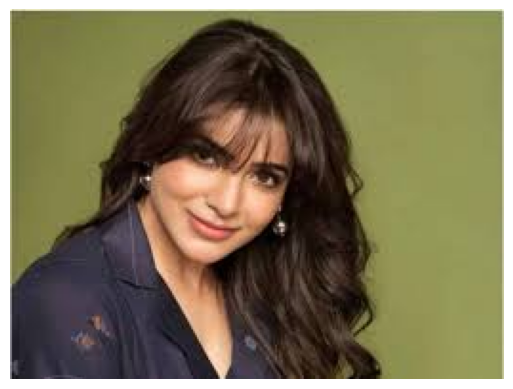

In [116]:
def load_image(image_path):
    image = cv2.imread(image_path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return rgb_image

# Replace 'path_to_your_image.jpg' with your actual image path
image_path = 'D:\Myntra\woman.jpeg'
image = load_image(image_path)

# Display the loaded image
plt.imshow(image)
plt.axis('off')
plt.show()


In [117]:
detector = dlib.get_frontal_face_detector()
face_rects = detector(image, 1)
if len(face_rects) > 0:
    face_rect = face_rects[0]
    print("Face detected.")
else:
    print("No face detected.")


Face detected.


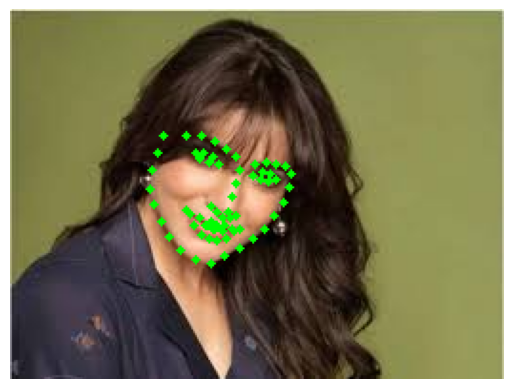

In [118]:
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
shape = predictor(image, face_rect)
landmarks = [(p.x, p.y) for p in shape.parts()]

image_with_landmarks = image.copy()
for (x, y) in landmarks:
    cv2.circle(image_with_landmarks, (x, y), 2, (0, 255, 0), -1)

plt.imshow(image_with_landmarks)
plt.axis('off')
plt.show()


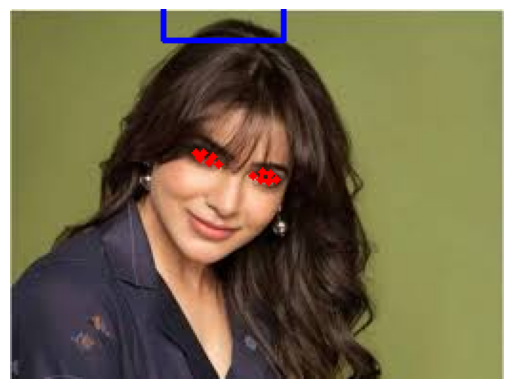

In [119]:
# Extract eye regions
left_eye = landmarks[36:42]
right_eye = landmarks[42:48]

# Define a region for hair (above the forehead region)
forehead = landmarks[0:17]  # Jawline points, typically used to estimate hair region
hair_region = (min(forehead, key=lambda p: p[1])[1] - 100, face_rect.left(), face_rect.width(), 50)

# Plot regions on the image
image_with_regions = image.copy()
for (x, y) in left_eye + right_eye:
    cv2.circle(image_with_regions, (x, y), 2, (255, 0, 0), -1)

cv2.rectangle(image_with_regions, (hair_region[1], hair_region[0]), (hair_region[1] + hair_region[2], hair_region[0] + hair_region[3]), (0, 0, 255), 2)

plt.imshow(image_with_regions)
plt.axis('off')
plt.show()


In [120]:
def extract_dominant_color(image, region, k=1):
    x, y, w, h = region
    roi = image[y:y+h, x:x+w]
    print(f"Region of interest shape: {roi.shape}")
    if roi.shape[0] == 0 or roi.shape[1] == 0:
        return np.array([0, 0, 0])  # Return black if the region is empty
    roi = roi.reshape((roi.shape[0] * roi.shape[1], 3))
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(roi)
    return kmeans.cluster_centers_[0]

# Calculate eye region coordinates
left_eye_x = min([point[0] for point in left_eye])
left_eye_y = min([point[1] for point in left_eye])
left_eye_w = max([point[0] for point in left_eye]) - left_eye_x
left_eye_h = max([point[1] for point in left_eye]) - left_eye_y

right_eye_x = min([point[0] for point in right_eye])
right_eye_y = min([point[1] for point in right_eye])
right_eye_w = max([point[0] for point in right_eye]) - right_eye_x
right_eye_h = max([point[1] for point in right_eye]) - right_eye_y

# Extract colors with debugging
print("Extracting left eye color...")
left_eye_color = extract_dominant_color(image, (left_eye_x, left_eye_y, left_eye_w, left_eye_h))
print(f"Left Eye Color: {left_eye_color}")

print("Extracting right eye color...")
right_eye_color = extract_dominant_color(image, (right_eye_x, right_eye_y, right_eye_w, right_eye_h))
print(f"Right Eye Color: {right_eye_color}")

print("Extracting hair color...")
hair_color = extract_dominant_color(image, hair_region)
print(f"Hair Color: {hair_color}")

print("Extracting skin color...")
skin_color = extract_dominant_color(image, (face_rect.left(), face_rect.top(), face_rect.width(), face_rect.height()))
print(f"Skin Color: {skin_color}")


Extracting left eye color...
Region of interest shape: (6, 12, 3)
Left Eye Color: [84.83333333 59.13888889 43.91666667]
Extracting right eye color...
Region of interest shape: (5, 12, 3)
Right Eye Color: [82.38333333 53.53333333 40.46666667]
Extracting hair color...
Region of interest shape: (50, 0, 3)
Hair Color: [0 0 0]
Extracting skin color...
Region of interest shape: (64, 63, 3)
Skin Color: [165.67286706 116.33308532  90.22891865]


c:\users\-\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\-\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\-\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


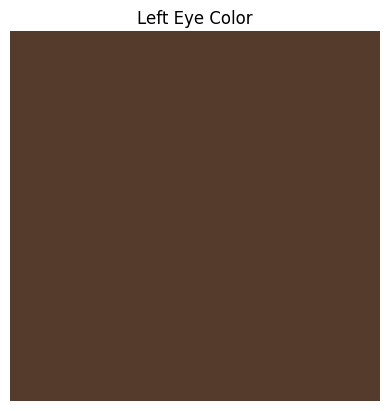

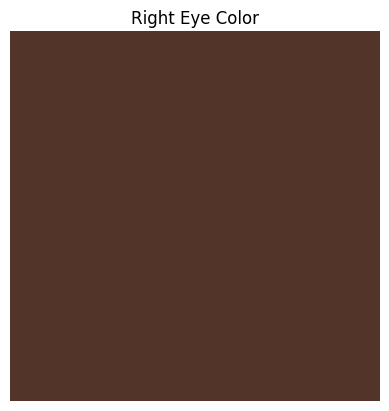

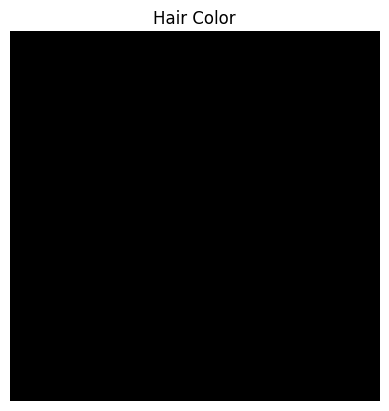

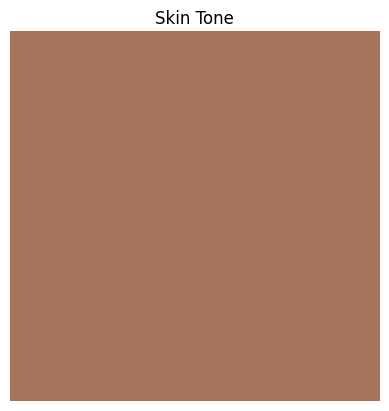

In [121]:
# Function to visualize colors
def display_color(color, title):
    swatch = np.zeros((100, 100, 3), dtype=np.uint8)
    swatch[:, :] = color
    plt.imshow(swatch)
    plt.title(title)
    plt.axis('off')
    plt.show()

display_color(left_eye_color, 'Left Eye Color')
display_color(right_eye_color, 'Right Eye Color')
display_color(hair_color, 'Hair Color')
display_color(skin_color, 'Skin Tone')
